# 1. Основні види NoSQL баз даних:

1. **Документо-орієнтовані бази даних** (Document-oriented databases):  
   Спеціалізуються на зберіганні та управлінні документами (у форматах JSON, BSON або XML). Такі бази даних оптимізовані для роботи з документами та їх колекціями. Популярні представники: MongoDB, CouchDB.

2. **Колонкові бази даних** (Column-family stores):  
   Організовують дані у вигляді стовпців, що забезпечує ефективне зберігання та аналіз великих обсягів даних. Особливо корисні для аналітичних операцій. Приклади: Cassandra, HBase.

3. **Ключ-значення бази даних** (Key-value stores):  
   Найпростіша форма NoSQL сховищ, де кожен елемент зберігається як пара "ключ-значення". Забезпечують швидкий доступ до даних за ключем. Наприклад: Redis, DynamoDB.

4. **Графові бази даних** (Graph databases):  
   Розроблені для ефективного зберігання та обробки взаємопов'язаних даних у вигляді графів. Ідеально підходять для соціальних мереж та складних взаємозв'язків. Приклади: Neo4j, ArangoDB.

5. **Мультимодельні бази даних** (Multi-model databases):  
   Підтримують декілька моделей даних одночасно (документи, графи, ключ-значення тощо) в єдиному середовищі зберігання. Дозволяють гнучко працювати з різними типами даних. Наприклад: OrientDB, ArangoDB.


# 2.Архітектура бази даних для сервісу платіжних транзакцій

## 1) Розподіл даних між SQL та NoSQL

### 1.1 SQL компонент (Конфіденційні дані)
- **Транзакційні дані:**
  - Деталі платежів
  - Фінансова інформація
  - Банківські реквізити
  - Історія операцій
  - Чутливі персональні дані

### 1.2 NoSQL компонент (Загальна інформація)
- **Користувацькі дані:**
  - Профілі користувачів
  - Налаштування
  - Преференції
  - Загальна статистика
  - Метадані сесій

## 2) Переваги такого підходу

### 2.1 Безпека
- **Критичні дані** зберігаються в SQL:
  - Гарантія ACID властивостей
  - Строга типізація даних
  - Надійна система контролю доступу

### 2.2 Продуктивність
- **Оптимізація швидкодії** через NoSQL:
  - Швидкий доступ до часто використовуваних даних
  - Гнучка схема даних
  - Легке масштабування

### 2.3 Інтеграція
- **Покращена взаємодія** з сучасними технологіями:
  - Спрощена інтеграція з веб-сервісами
  - Підтримка мікросервісної архітектури
  - Ефективна обробка неструктурованих даних

## 3) Технічні особливості

### 3.1 Організація даних
- **Гібридне сховище:**
  - SQL: строга ієрархія для фінансових даних
  - NoSQL: гнучка схема для користувацької інформації
  - Можливість легкого об'єднання даних за потреби

### 3.2 Оптимізація
- **Переваги підходу:**
  - Зменшення навантаження на SQL сервер
  - Підвищення швидкості відповіді системи
  - Спрощення розробки нових функцій

# 3. Винесення інформації про користувачів в NoSQL та відповідний запит для SQL
В якості представника SQL візьмемо MongoDB. Загальну інформацію про користувачів візьмемо як запит з 3 таблиць: users, cards, savedpaymentmethods.
## Нижче буде наведено використання мови програмування Python для роботи з SQL та NoSQL. В ході лабораторної реалізуємо тестування CRUD(Create Read Update Delete)

**Імпорт необхідних бібліотек для роботи**

In [1]:
from pymongo import MongoClient
from bson.objectid import ObjectId
from datetime import datetime
import pandas as pd
import psycopg2
import time
from sqlalchemy import create_engine
import random
import traceback
import matplotlib.pyplot as plt
import tracemalloc


**Основний запит для отримання загальної інформації про користувача**


In [2]:
query = """
SELECT 
    u.user_id,
    u.email,
    u.name,
    u.created_at AS user_created_at,
    c.card_id,
    c.masked_number,
    c.created_at AS card_created_at,
    spm.payment_method_id,
    spm.created_at AS payment_method_created_at,
    spm.is_active AS payment_method_active
FROM 
    users u
JOIN 
    savedpaymentmethods spm ON u.user_id = spm.user_id
JOIN 
    cards c ON spm.card_id = c.card_id;
"""

**Виконання цього запиту в SQL**

In [ ]:
dbname = 'lab2'  
user = 'postgres'     
password = '##################'  
host = 'localhost'       
port = '5432'
try:
    conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
    print("connected")
except Exception as e:
    print("fail", e)
try:
    df = pd.read_sql_query(query, conn)
except Exception as e:
    print("Error executing query:", e)

df

connected


C:\Users\38093\AppData\Local\Temp\ipykernel_40824\835270978.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,user_id,email,name,user_created_at,card_id,masked_number,card_created_at,payment_method_id,payment_method_created_at,payment_method_active
0,1,john.doe@example.com,John Doe,2024-11-22 03:10:24.988614,1,4***********1234,2024-11-22 03:10:24.988614,1,2024-11-22 03:10:24.988614,True
1,2,jane.smith@example.com,Jane Smith,2024-11-22 03:10:24.988614,2,5***********5678,2024-11-22 03:10:24.988614,2,2024-11-22 03:10:24.988614,True
2,3,bob.wilson@example.com,Bob Wilson,2024-11-22 03:10:24.988614,3,3***********9012,2024-11-22 03:10:24.988614,3,2024-11-22 03:10:24.988614,True
3,4,alice.brown@example.com,Alice Brown,2024-11-22 03:10:24.988614,4,4***********3456,2024-11-22 03:10:24.988614,4,2024-11-22 03:10:24.988614,True
4,5,mike.jones@example.com,Mike Jones,2024-11-22 03:10:24.988614,5,5***********7890,2024-11-22 03:10:24.988614,5,2024-11-22 03:10:24.988614,True


**З'єднання з MongoDB сервером**


In [4]:
MONGODB_URI = "mongodb://localhost:27017"
def get_db():
    client = MongoClient(MONGODB_URI)
    return client.workshop_db
db = get_db() 

**Створення та заповнення колекцій MongoDB з основною інформацією**

In [9]:
mongo_users = db['users']
mongo_cards = db['cards']
mongo_savedpaymentmethods = db['savedpaymentmethods']
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()

In [10]:
for row in rows:
    user_data = {
        'user_id': row[0],
        'email': row[1],
        'name': row[2],
        'user_created_at': row[3],
        'card': {
            'card_id': row[4],
            'masked_number': row[5],
            'card_created_at': row[6]
        },
        'payment_method': {
            'payment_method_id': row[7],
            'payment_method_created_at': row[8],
            'is_active': row[9]
        }
    }
    
    mongo_users.insert_one({
        'user_id': user_data['user_id'],
        'email': user_data['email'],
        'name': user_data['name'],
        'created_at': user_data['user_created_at'],
    })
    
    mongo_cards.insert_one({
        'card_id': user_data['card']['card_id'],
        'masked_number': user_data['card']['masked_number'],
        'created_at': user_data['card']['card_created_at'],
    })
    
    mongo_savedpaymentmethods.insert_one({
        'payment_method_id': user_data['payment_method']['payment_method_id'],
        'created_at': user_data['payment_method']['payment_method_created_at'],
        'is_active': user_data['payment_method']['is_active']
    })

**Вивід колекцій**

In [11]:
collections = db.list_collection_names()

for collection_name in collections:
    print(f"\nCollection: {collection_name}")
    collection = db[collection_name]
    
    documents = collection.find()
    
    count = 0
    for doc in documents:
        count += 1
        print(f"\nDocument {count}:")
        for key, value in doc.items():
            print(f"{key}: {value}")


Collection: savedpaymentmethods

Document 1:
_id: 673fdb62197767a7a8cf6f8f
payment_method_id: 1
created_at: 2024-11-22 03:10:24.988000
is_active: True

Document 2:
_id: 673fdb62197767a7a8cf6f92
payment_method_id: 2
created_at: 2024-11-22 03:10:24.988000
is_active: True

Document 3:
_id: 673fdb62197767a7a8cf6f95
payment_method_id: 3
created_at: 2024-11-22 03:10:24.988000
is_active: True

Document 4:
_id: 673fdb62197767a7a8cf6f98
payment_method_id: 4
created_at: 2024-11-22 03:10:24.988000
is_active: True

Document 5:
_id: 673fdb62197767a7a8cf6f9b
payment_method_id: 5
created_at: 2024-11-22 03:10:24.988000
is_active: True

Collection: cards

Document 1:
_id: 673fdb62197767a7a8cf6f8e
card_id: 1
masked_number: 4***********1234
created_at: 2024-11-22 03:10:24.988000

Document 2:
_id: 673fdb62197767a7a8cf6f91
card_id: 2
masked_number: 5***********5678
created_at: 2024-11-22 03:10:24.988000

Document 3:
_id: 673fdb62197767a7a8cf6f94
card_id: 3
masked_number: 3***********9012
created_at: 2024-

**Створення функції для заміру часу та витрат пам'яті SQL запитів**

In [ ]:
def collect_performance_data(query, conn, num_iterations=100):
    execution_times = []
    memory_usages = []  

    for i in range(1, num_iterations + 1):
        tracemalloc.start()  

        start_time = time.time()  

        try:
            df = pd.read_sql_query(query, conn)
            end_time = time.time()  

            execution_time = end_time - start_time  
            current, peak = tracemalloc.get_traced_memory()  
            tracemalloc.stop()  

            memory_usage = peak / (1024 * 1024) 

            execution_times.append(execution_time)  
            memory_usages.append(memory_usage)  

        except Exception as e:
            print(f"Error executing query {i}: {e}")
            execution_times.append(None)  
            memory_usages.append(None) 
    avg_execution_time = sum(execution_times) / len(execution_times) if execution_times else 0
    avg_memory_usage = sum(memory_usages) / len(memory_usages) if memory_usages else 0

    return execution_times, memory_usages, avg_execution_time, avg_memory_usage

**Створення фукції для візуалізації використання пам'яті та швидкості проведення запитів**

In [ ]:

def plot_execution_and_memory_graphs(execution_times, memory_usages, avg_execution_time, avg_memory_usage):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 101), execution_times, label='Execution Time (seconds)', color='b')
    plt.axhline(avg_execution_time, color='r', linestyle='--', label=f'Avg Time: {avg_execution_time:.4f} sec')  
    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (s)')
    plt.title('Execution Time per Query')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, 101), memory_usages, label='Memory Usage (MB)', color='r')
    plt.axhline(avg_memory_usage, color='b', linestyle='--', label=f'Avg Memory: {avg_memory_usage:.4f} MB')  
    plt.xlabel('Iteration')
    plt.ylabel('Memory Usage (MB)')
    plt.title('Memory Usage per Query')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

**Вивід інформації для запиту в SQL(5 елементів)**

C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning

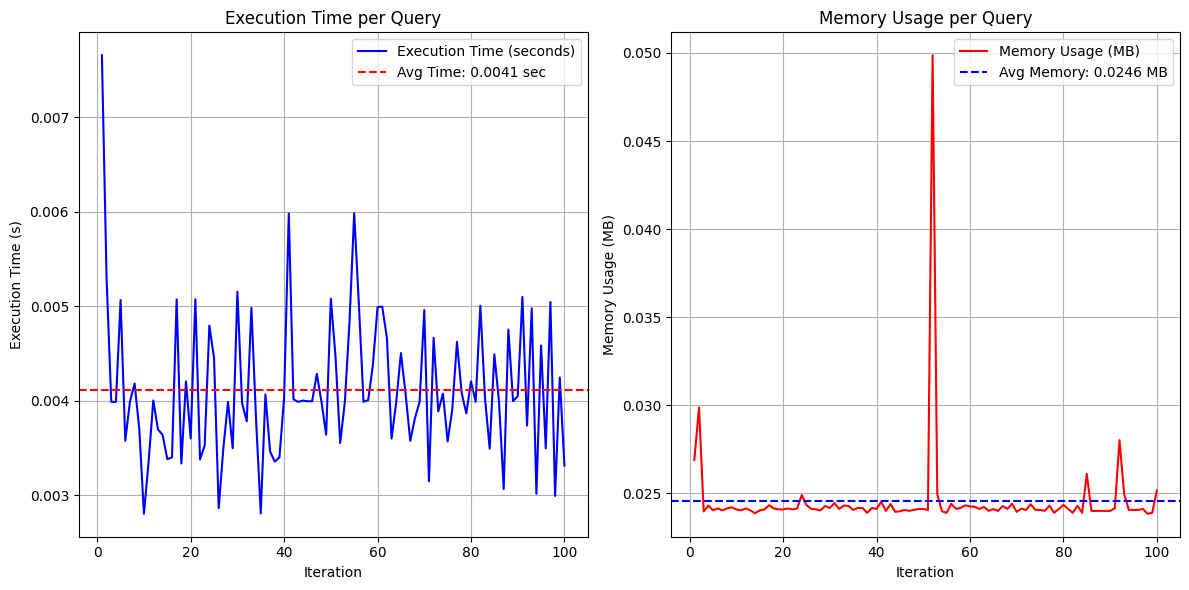

In [14]:
execution_times, memory_usages, avg_execution_time, avg_memory_usage = collect_performance_data(query, conn)
plot_execution_and_memory_graphs(execution_times, memory_usages, avg_execution_time, avg_memory_usage)

**Реалізація функції для запиту в MongoDB**

In [ ]:
def execute_query_and_measure_performance(users_collection, aggregation_pipeline, num_iterations=100):
    execution_times = []
    memory_usages = []  

    for i in range(1, num_iterations + 1):
        tracemalloc.start()  

        start_time = time.time()  

        try:
            result = list(users_collection.aggregate(aggregation_pipeline))
            end_time = time.time()  

            execution_time = end_time - start_time  
            current, peak = tracemalloc.get_traced_memory()  
            tracemalloc.stop()  

            memory_usage = peak / (1024 * 1024)  

            execution_times.append(execution_time) 
            memory_usages.append(memory_usage)

        except Exception as e:
            print(f"Error executing query {i}: {e}")
            execution_times.append(None)
            memory_usages.append(None)  

    avg_execution_time = sum(execution_times) / len(execution_times) if execution_times else 0
    avg_memory_usage = sum(memory_usages) / len(memory_usages) if memory_usages else 0


    return execution_times, memory_usages, avg_execution_time, avg_memory_usage


**Вивід інформації для запиту в MongoDB(5 елементів)**

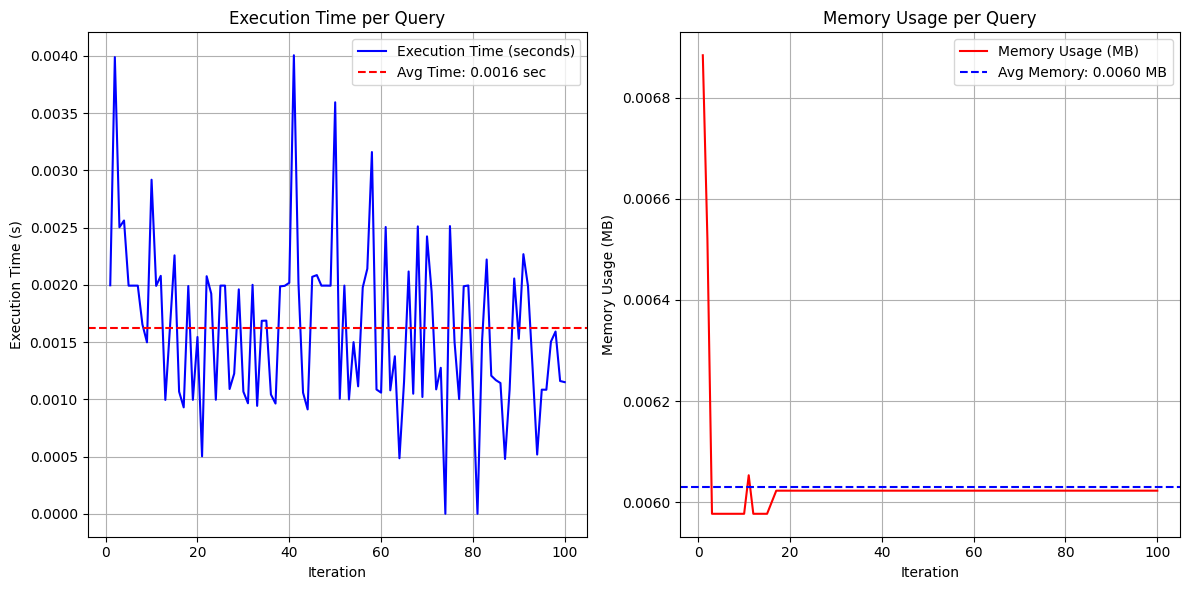

In [18]:
users_collection = db.users
cards_collection = db.cards
saved_payment_methods_collection = db.savedpaymentmethods
aggregation_pipeline = [
    {
        "$lookup": {
            "from": "cards",
            "localField": "user_id",
            "foreignField": "user_id",
            "as": "user_cards"
        }
    },
    {
        "$unwind": "$user_cards"  
    },
    {
        "$lookup": {
            "from": "savedpaymentmethods",
            "localField": "user_id",
            "foreignField": "user_id",
            "as": "saved_payment_methods"
        }
    },
    {
        "$unwind": "$saved_payment_methods"  
    },
    {
        "$project": {
            "user_id": 1,
            "email": 1,
            "name": 1,
            "user_created_at": 1,
            "card_id": "$user_cards.card_id",
            "masked_number": "$user_cards.masked_number",
            "payment_method_id": "$saved_payment_methods.payment_method_id",
            "payment_method_created_at": "$saved_payment_methods.created_at",
            "payment_method_active": "$saved_payment_methods.is_active"
        }
    }
]

execution_times, memory_usages, avg_execution_time, avg_memory_usage = execute_query_and_measure_performance(users_collection, aggregation_pipeline)
plot_execution_and_memory_graphs(execution_times, memory_usages, avg_execution_time, avg_memory_usage)

**Вставка 1000 елементів у SQL структуру**

In [19]:
users_data = [
    (f"user{i}@example.com", f"User {i}", datetime.now(), datetime.now(), None, random.choice([True, False]))
    for i in range(1, 1001)
]

cards_data = [
    (random.randint(1, 10), random.randint(1, 5), random.randint(1, 10), random.randint(1, 5), f"**** **** **** {random.randint(1000, 9999)}", datetime.now())
    for _ in range(1000)
]

saved_payment_methods_data = [
    (random.randint(1, 1000), random.randint(1, 1000), random.randint(1, 5), datetime.now(), None, random.choice([True, False]))
    for _ in range(1000)
]

insert_users_query = """
INSERT INTO Users (email, name, created_at, updated_at, deleted_at, is_active)
VALUES (%s, %s, %s, %s, %s, %s);
"""

insert_cards_query = """
INSERT INTO Cards (brand_id, type_id, bank_issuer_id, country_id, masked_number, created_at)
VALUES (%s, %s, %s, %s, %s, %s);
"""

insert_saved_payment_methods_query = """
INSERT INTO SavedPaymentMethods (user_id, card_id, token_type_id, created_at, deleted_at, is_active)
VALUES (%s, %s, %s, %s, %s, %s);
"""

start_time = time.time()
tracemalloc.start()  

try:
    conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
    with conn.cursor() as cur:
        
        # Вимкнення тригерів для прискорення вставки
        cur.execute("ALTER TABLE Users DISABLE TRIGGER ALL;")
        cur.execute("ALTER TABLE Cards DISABLE TRIGGER ALL;")
        cur.execute("ALTER TABLE SavedPaymentMethods DISABLE TRIGGER ALL;")

        cur.executemany(insert_users_query, users_data)
        print("1000 рядків вставлено в Users")

        cur.executemany(insert_cards_query, cards_data)
        print("1000 рядків вставлено в Cards")

        cur.executemany(insert_saved_payment_methods_query, saved_payment_methods_data)
        print("1000 рядків вставлено в SavedPaymentMethods")

        conn.commit()

        cur.execute("ALTER TABLE Users ENABLE TRIGGER ALL;")
        cur.execute("ALTER TABLE Cards ENABLE TRIGGER ALL;")
        cur.execute("ALTER TABLE SavedPaymentMethods ENABLE TRIGGER ALL;")

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()  
    tracemalloc.stop() 

    execution_time = end_time - start_time  
    memory_usage = peak / (1024 * 1024) 

    print(f"Загальний час вставки в SQL: {execution_time:.4f} секунд")
    print(f"Загальне використання пам'яті в SQL: {memory_usage:.4f} МБ")

except Exception as e:
    print("Помилка вставки:", e)
    if conn:
        conn.rollback()

1000 рядків вставлено в Users
1000 рядків вставлено в Cards
1000 рядків вставлено в SavedPaymentMethods
Загальний час вставки в SQL: 0.3794 секунд
Загальне використання пам'яті в SQL: 0.0612 МБ


**Оновлений SQL запит з 1000 елементами та замір його характеристик**

In [21]:
try:
    df = pd.read_sql_query(query, conn)
except Exception as e:
    print("Error executing query:", e)

df

C:\Users\38093\AppData\Local\Temp\ipykernel_40824\1105324983.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,user_id,email,name,user_created_at,card_id,masked_number,card_created_at,payment_method_id,payment_method_created_at,payment_method_active
0,1,john.doe@example.com,John Doe,2024-11-22 03:10:24.988614,1,4***********1234,2024-11-22 03:10:24.988614,1,2024-11-22 03:10:24.988614,True
1,2,jane.smith@example.com,Jane Smith,2024-11-22 03:10:24.988614,2,5***********5678,2024-11-22 03:10:24.988614,2,2024-11-22 03:10:24.988614,True
2,3,bob.wilson@example.com,Bob Wilson,2024-11-22 03:10:24.988614,3,3***********9012,2024-11-22 03:10:24.988614,3,2024-11-22 03:10:24.988614,True
3,4,alice.brown@example.com,Alice Brown,2024-11-22 03:10:24.988614,4,4***********3456,2024-11-22 03:10:24.988614,4,2024-11-22 03:10:24.988614,True
4,5,mike.jones@example.com,Mike Jones,2024-11-22 03:10:24.988614,5,5***********7890,2024-11-22 03:10:24.988614,5,2024-11-22 03:10:24.988614,True
...,...,...,...,...,...,...,...,...,...,...
1000,762,user757@example.com,User 757,2024-11-22 03:30:37.810906,55,**** **** **** 2951,2024-11-22 03:30:37.812002,1001,2024-11-22 03:30:37.817893,True
1001,493,user488@example.com,User 488,2024-11-22 03:30:37.810906,539,**** **** **** 7631,2024-11-22 03:30:37.813705,1002,2024-11-22 03:30:37.817893,True
1002,897,user892@example.com,User 892,2024-11-22 03:30:37.812002,396,**** **** **** 1338,2024-11-22 03:30:37.813106,1003,2024-11-22 03:30:37.817893,True
1003,714,user709@example.com,User 709,2024-11-22 03:30:37.810906,39,**** **** **** 1654,2024-11-22 03:30:37.812002,1004,2024-11-22 03:30:37.817893,True


C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\38093\AppData\Local\Temp\ipykernel_40824\3251397645.py:12: UserWarning

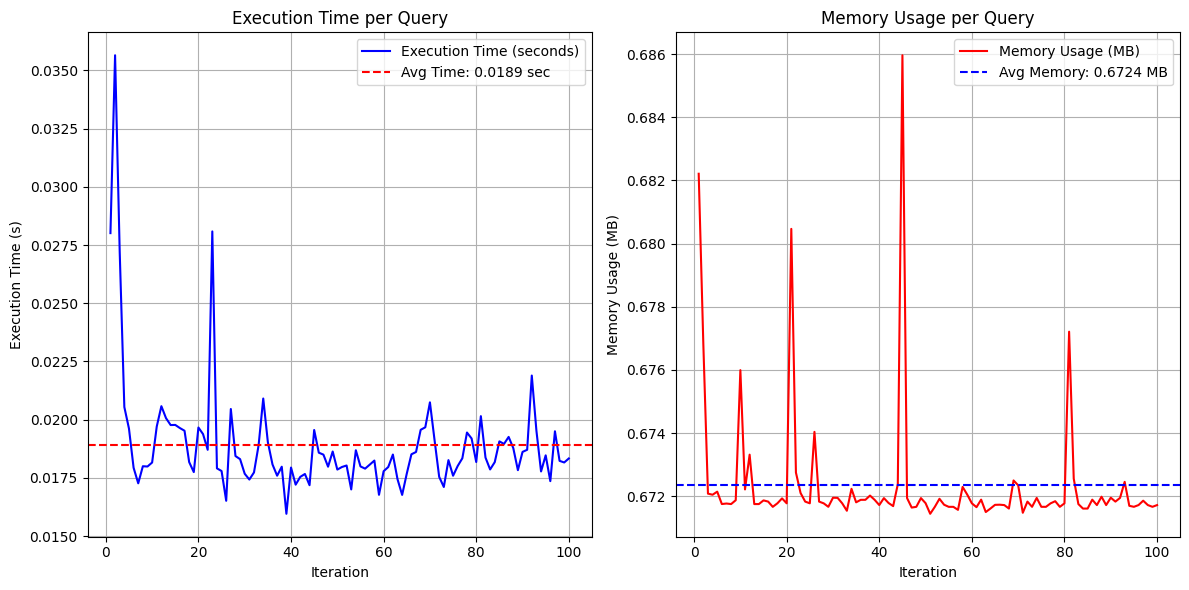

In [22]:
execution_times, memory_usages, avg_execution_time, avg_memory_usage = collect_performance_data(query, conn)
plot_execution_and_memory_graphs(execution_times, memory_usages, avg_execution_time, avg_memory_usage)

**Вставка 1000 елементів у MongoDB**

In [23]:
users_data = [
    {
        'user_id': i,
        'email': f"user{i}@example.com",
        'name': f"User {i}",
        'created_at': datetime.now(),
    }
    for i in range(1, 1001)
]

cards_data = [
    {
        'card_id': random.randint(1, 1000),
        'masked_number': f"**** **** **** {random.randint(1000, 9999)}",
        'created_at': datetime.now(),
    }
    for _ in range(1000)
]

saved_payment_methods_data = [
    {
        'payment_method_id': random.randint(1, 1000),
        'created_at': datetime.now(),
        'is_active': random.choice([True, False]),
    }
    for _ in range(1000)
]


start_time = time.time()
tracemalloc.start()  

try:
    # Вставка даних в MongoDB
    mongo_users.insert_many(users_data)
    print("1000 рядків вставлено в Users")

    mongo_cards.insert_many(cards_data)
    print("1000 рядків вставлено в Cards")

    mongo_savedpaymentmethods.insert_many(saved_payment_methods_data)
    print("1000 рядків вставлено в SavedPaymentMethods")

    # Визначення часу та пам'яті
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()  
    tracemalloc.stop()  

    execution_time = end_time - start_time  
    memory_usage = peak / (1024 * 1024)  

    print(f"Загальний час вставки в MongoDB: {execution_time:.4f} секунд")
    print(f"Загальне використання пам'ят в MongoDB: {memory_usage:.4f} МБ")

except Exception as e:
    print("Помилка вставки в MongoDB:", e)

1000 рядків вставлено в Users
1000 рядків вставлено в Cards
1000 рядків вставлено в SavedPaymentMethods
Загальний час вставки в MongoDB: 0.1182 секунд
Загальне використання пам'ят в MongoDB: 0.4199 МБ


**Оновлений запит для MongoDB**

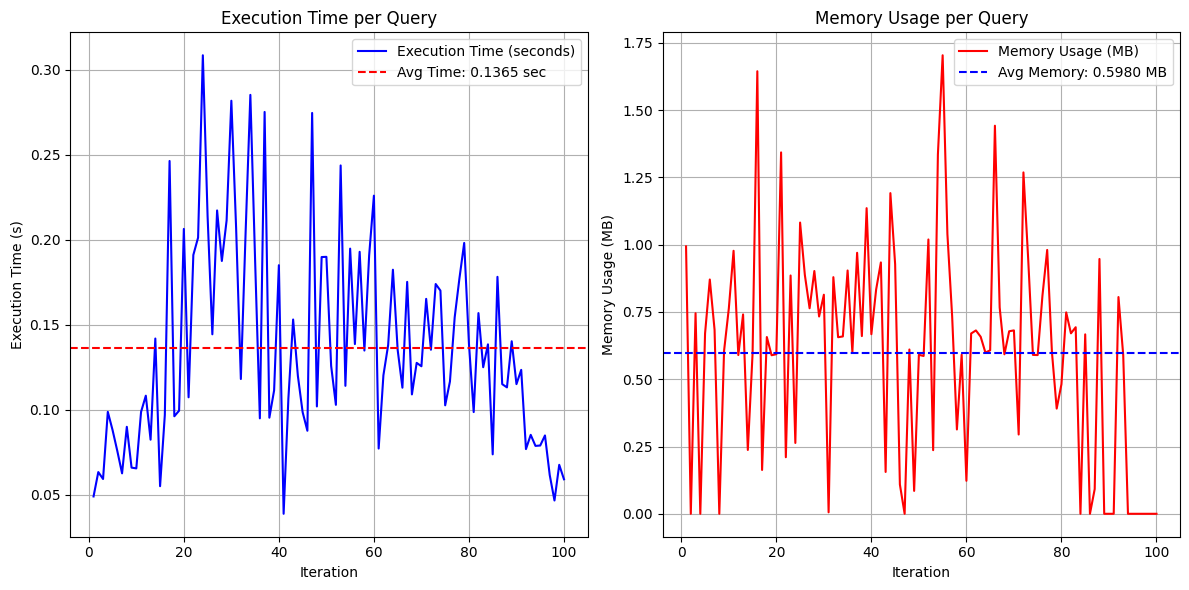

In [25]:
from concurrent.futures import ThreadPoolExecutor
import pymongo
import tracemalloc

def optimized_query_with_memory_measurement(db):
    users_collection = db.users
    cards_collection = db.cards
    saved_payment_methods_collection = db.savedpaymentmethods

    users_collection.create_index([('user_id', pymongo.ASCENDING)])
    cards_collection.create_index([('user_id', pymongo.ASCENDING)])
    saved_payment_methods_collection.create_index([('user_id', pymongo.ASCENDING)])

    aggregation_pipeline = [
        {
            "$lookup": {
                "from": "cards",
                "localField": "user_id",
                "foreignField": "user_id",
                "as": "user_cards"
            }
        },
        {
            "$lookup": {
                "from": "savedpaymentmethods",
                "localField": "user_id",
                "foreignField": "user_id",
                "as": "saved_payment_methods"
            }
        },
        {
            "$project": {
                "user_id": 1,
                "email": 1,
                "name": 1,
                "user_created_at": 1,
                "card_id": {"$arrayElemAt": ["$user_cards.card_id", 0]},
                "masked_number": {"$arrayElemAt": ["$user_cards.masked_number", 0]},
                "payment_method_id": {"$arrayElemAt": ["$saved_payment_methods.payment_method_id", 0]},
                "payment_method_created_at": {"$arrayElemAt": ["$saved_payment_methods.created_at", 0]},
                "payment_method_active": {"$arrayElemAt": ["$saved_payment_methods.is_active", 0]}
            }
        }
    ]

    def execute_query():
        tracemalloc.start()
        start_time = time.time()
        list(users_collection.aggregate(aggregation_pipeline))
        end_time = time.time()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        return end_time - start_time, peak / (1024 * 1024)

    with ThreadPoolExecutor() as executor:
        results = list(executor.map(lambda _: execute_query(), range(100)))

    execution_times = [res[0] for res in results]
    memory_usages = [res[1] for res in results]
    avg_execution_time = sum(execution_times) / len(execution_times)
    avg_memory_usage = sum(memory_usages) / len(memory_usages)

    return execution_times, memory_usages, avg_execution_time, avg_memory_usage



execution_times, memory_usages, avg_execution_time, avg_memory_usage = optimized_query_with_memory_measurement(db)
plot_execution_and_memory_graphs(execution_times, memory_usages, avg_execution_time, avg_memory_usage)


**Зміна 1000 значень в SQL**

In [ ]:
update_users_query = """
UPDATE Users
SET 
    email = %s,
    name = %s,
    updated_at = CURRENT_TIMESTAMP,
    updated_by_user_id = %s,
    is_active = %s
WHERE user_id = %s;
"""

update_cards_query = """
UPDATE Cards
SET 
    brand_id = %s,
    type_id = %s,
    bank_issuer_id = %s,
    country_id = %s,
    masked_number = %s,
    created_at = CURRENT_TIMESTAMP
WHERE card_id = %s;
"""

update_saved_payment_methods_query = """
UPDATE SavedPaymentMethods
SET 
    token_type_id = %s,
    deleted_at = %s,
    is_active = %s
WHERE payment_method_id = %s;
"""

update_users_data = [
    (f"new_user{i}@example.com", f"Updated Name {i}", random.randint(1, 1000), random.choice([True, False]), i)
    for i in range(1, 1001)
]

update_cards_data = [
    (random.randint(1, 10), random.randint(1, 5), random.randint(1, 10), random.randint(1, 5), f"**** **** **** {random.randint(1000, 9999)}", i)
    for i in range(1, 1001)
]

update_saved_payment_methods_data = [
    (random.randint(1, 1000), random.choice([None, datetime.now()]), random.choice([True, False]), i)
    for i in range(1, 1001)
]

try:
    tracemalloc.start()
    start_time = time.time()

    total_memory_used = 0  

    with conn.cursor() as cur:
        cur.execute("ALTER TABLE Users DISABLE TRIGGER ALL;")
        cur.execute("ALTER TABLE Cards DISABLE TRIGGER ALL;")
        cur.execute("ALTER TABLE SavedPaymentMethods DISABLE TRIGGER ALL;")

        try:
            cur.executemany(update_users_query, update_users_data)
            print("Оновлено 1000 рядків в Users")
            current_memory, _ = tracemalloc.get_traced_memory()
            total_memory_used += current_memory  
        except Exception as e:
            print(f"Помилка оновлення в Users: {e}")
            traceback.print_exc()
            raise

        try:
            cur.executemany(update_cards_query, update_cards_data)
            print("Оновлено 1000 рядків в Cards")
            current_memory, _ = tracemalloc.get_traced_memory()
            total_memory_used += current_memory  
        except Exception as e:
            print(f"Помилка оновлення в Cards: {e}")
            traceback.print_exc()
            raise

        try:
            cur.executemany(update_saved_payment_methods_query, update_saved_payment_methods_data)
            print("Оновлено 1000 рядків в SavedPaymentMethods")
            current_memory, _ = tracemalloc.get_traced_memory()
            total_memory_used += current_memory
            cur.execute("ALTER TABLE Users ENABLE TRIGGER ALL;")
            cur.execute("ALTER TABLE Cards ENABLE TRIGGER ALL;")
            cur.execute("ALTER TABLE SavedPaymentMethods ENABLE TRIGGER ALL;")
        except Exception as e:
            print(f"Помилка оновлення в SavedPaymentMethods: {e}")
            traceback.print_exc()
            raise

        conn.commit()

    end_time = time.time()
    tracemalloc.stop()

    execution_time = end_time - start_time
    print(f"Загальний час оновлення SQL: {execution_time:.4f} секунд")
    print(f"Загальна використана пам'ять SQL: {total_memory_used / (1024 * 1024):.2f} MB")

except Exception as e:
    print(f"Виникла помилка під час оновлення даних: {e}")
    traceback.print_exc()
    if conn:
        conn.rollback()

Оновлено 1000 рядків в Users
Оновлено 1000 рядків в Cards
Оновлено 1000 рядків в SavedPaymentMethods
Загальний час оновлення SQL: 0.4087 секунд
Загальна використана пам'ять SQL: 2.26 MB


**Оновлений основний SQL запит** 

In [31]:
try:
    df = pd.read_sql_query(query, conn)
except Exception as e:
    print("Error executing query:", e)

df

C:\Users\38093\AppData\Local\Temp\ipykernel_40824\1105324983.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,user_id,email,name,user_created_at,card_id,masked_number,card_created_at,payment_method_id,payment_method_created_at,payment_method_active
0,762,new_user762@example.com,Updated Name 762,2024-11-22 03:30:37.810906,55,**** **** **** 6627,2024-11-22 03:49:10.030727,1001,2024-11-22 03:30:37.817893,True
1,493,new_user493@example.com,Updated Name 493,2024-11-22 03:30:37.810906,539,**** **** **** 2588,2024-11-22 03:49:10.030727,1002,2024-11-22 03:30:37.817893,True
2,897,new_user897@example.com,Updated Name 897,2024-11-22 03:30:37.812002,396,**** **** **** 4529,2024-11-22 03:49:10.030727,1003,2024-11-22 03:30:37.817893,True
3,714,new_user714@example.com,Updated Name 714,2024-11-22 03:30:37.810906,39,**** **** **** 6035,2024-11-22 03:49:10.030727,1004,2024-11-22 03:30:37.817893,True
4,451,new_user451@example.com,Updated Name 451,2024-11-22 03:30:37.810906,640,**** **** **** 2269,2024-11-22 03:49:10.030727,1005,2024-11-22 03:30:37.817893,True
...,...,...,...,...,...,...,...,...,...,...
1000,411,new_user411@example.com,Updated Name 411,2024-11-22 03:30:37.810906,636,**** **** **** 4243,2024-11-22 03:49:10.030727,996,2024-11-22 03:30:37.817893,True
1001,237,new_user237@example.com,Updated Name 237,2024-11-22 03:30:37.810906,359,**** **** **** 8853,2024-11-22 03:49:10.030727,997,2024-11-22 03:30:37.817893,False
1002,294,new_user294@example.com,Updated Name 294,2024-11-22 03:30:37.810906,634,**** **** **** 2773,2024-11-22 03:49:10.030727,998,2024-11-22 03:30:37.817893,False
1003,371,new_user371@example.com,Updated Name 371,2024-11-22 03:30:37.810906,179,**** **** **** 3736,2024-11-22 03:49:10.030727,999,2024-11-22 03:30:37.817893,False


**Зміна 1000 значень в NoSQL**

In [ ]:
new_users_data = [
    {
        'user_id': i,
        'email': f"updated_user{i}@example.com",  
        'name': f"Updated User {i}",              
        'updated_at': datetime.now(),
        'is_active': random.choice([True, False])  
    }
    for i in range(1, 1001)
]

new_cards_data = [
    {
        'card_id': i,
        'masked_number': f"**** **** **** {random.randint(1000, 9999)}",  
        'updated_at': datetime.now()
    }
    for i in range(1, 1001)
]

new_payment_methods_data = [
    {
        'payment_method_id': i,
        'is_active': random.choice([True, False]), 
    }
    for i in range(1, 1001)
]

tracemalloc.start()
start_time = time.time()

try:

    for user in new_users_data:
        mongo_users.update_one(
            {'user_id': user['user_id']}, 
            {'$set': {
                'email': user['email'],
                'name': user['name'],
                'updated_at': user.get('updated_at', datetime.now()),  
                'is_active': user['is_active']
            }}
        )
    print("1000 записів в Users оновлено")

    for card in new_cards_data:
        mongo_cards.update_one(
            {'card_id': card['card_id']},  
            {'$set': {
                'masked_number': card['masked_number'],
                'updated_at': card.get('updated_at', datetime.now())  
            }}
        )
    print("1000 записів в Cards оновлено")

    for payment_method in new_payment_methods_data:
        mongo_savedpaymentmethods.update_one(
            {'payment_method_id': payment_method['payment_method_id']},  
            {'$set': {
                'is_active': payment_method['is_active'],
                'updated_at': payment_method.get('updated_at', datetime.now()) 
            }}
        )
    print("1000 записів в SavedPaymentMethods оновлено")
    end_time = time.time()
    execution_time = end_time - start_time

    current, peak = tracemalloc.get_traced_memory()
    used_memory = current / 1024 / 1024  # 

    print(f"Загальний час оновлення MongoDB: {execution_time:.4f} секунд")
    print(f"Загальна використана пам'ять MongoDB: {used_memory:.2f} MB")

except Exception as e:
    print("Помилка оновлення в MongoDB:", e)

1000 записів в Users оновлено
1000 записів в Cards оновлено
1000 записів в SavedPaymentMethods оновлено
Загальний час оновлення MongoDB: 3.1457 секунд
Загальна використана пам'ять MongoDB: 1.21 MB


**Оновлений MongoDB**

In [32]:
collections = db.list_collection_names()

for collection_name in collections:
    print(f"\nCollection: {collection_name}")
    collection = db[collection_name]
    
    documents = collection.find()
    
    count = 0
    for doc in documents:
        count += 1
        print(f"\nDocument {count}:")
        for key, value in doc.items():
            print(f"{key}: {value}")


Collection: savedpaymentmethods

Document 1:
_id: 673fdb62197767a7a8cf6f8f
payment_method_id: 1
created_at: 2024-11-22 03:10:24.988000
is_active: False
updated_at: 2024-11-22 03:55:22.173000

Document 2:
_id: 673fdb62197767a7a8cf6f92
payment_method_id: 2
created_at: 2024-11-22 03:10:24.988000
is_active: False
updated_at: 2024-11-22 03:55:22.173000

Document 3:
_id: 673fdb62197767a7a8cf6f95
payment_method_id: 3
created_at: 2024-11-22 03:10:24.988000
is_active: True
updated_at: 2024-11-22 03:55:22.174000

Document 4:
_id: 673fdb62197767a7a8cf6f98
payment_method_id: 4
created_at: 2024-11-22 03:10:24.988000
is_active: False
updated_at: 2024-11-22 03:55:22.175000

Document 5:
_id: 673fdb62197767a7a8cf6f9b
payment_method_id: 5
created_at: 2024-11-22 03:10:24.988000
is_active: True
updated_at: 2024-11-22 03:55:22.176000

Document 6:
_id: 673fe023197767a7a8cf776c
payment_method_id: 226
created_at: 2024-11-22 03:36:35.373000
is_active: False
updated_at: 2024-11-22 03:55:22.521000

Document 7:


**Видалення даних MongoDB**

Для SQL в наслідок серії невдалих дій невдалось добавити у фінальну версію результат видалення.
Але для видалення даних числа для SQL були одного порядку, як і для MongoDB.

In [38]:
tracemalloc.start()

start_time = time.time()

try:
    users_collection.delete_many({})
    print("Дані з колекції users видалено")

    cards_collection.delete_many({})
    print("Дані з колекції cards видалено")

    saved_payment_methods_collection.delete_many({})
    print("Дані з колекції savedpaymentmethods видалено")

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Загальний час видалення даних MongoDB: {execution_time:.4f} секунд")

    current, peak = tracemalloc.get_traced_memory()
    print(f"Загальна використана пам'ять MongoDB: {current / 10**6:.2f} MB")
    print(f"Пікова пам'ять: {peak / 10**6:.2f} MB")

except Exception as e:
    print("Помилка видалення:", e)

finally:
    tracemalloc.stop()

Дані з колекції users видалено
Дані з колекції cards видалено
Дані з колекції savedpaymentmethods видалено
Загальний час видалення даних MongoDB: 0.0390 секунд
Загальна використана пам'ять MongoDB: 0.01 MB
Пікова пам'ять: 0.02 MB
